In [1]:
import folium
import pandas as pd
import numpy as np

In [2]:
# import data csv
df = pd.read_csv('transaction_data.csv')
df

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19996,19996,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19997,19997,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19998,19998,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


In [3]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20000 non-null  int64  
 1   transaction_id           20000 non-null  int64  
 2   product_id               20000 non-null  int64  
 3   CustomerID               20000 non-null  int64  
 4   transaction_date         20000 non-null  object 
 5   online_order             19640 non-null  object 
 6   order_status             20000 non-null  object 
 7   brand                    19803 non-null  object 
 8   product_line             19803 non-null  object 
 9   product_class            19803 non-null  object 
 10  product_size             19803 non-null  object 
 11  list_price               20000 non-null  float64
 12  standard_cost            19803 non-null  float64
 13  product_first_sold_date  19803 non-null  float64
 14  InvoiceDate           

In [4]:
# ubah tipe data invoicedate menjadi tipe datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               20000 non-null  int64         
 1   transaction_id           20000 non-null  int64         
 2   product_id               20000 non-null  int64         
 3   CustomerID               20000 non-null  int64         
 4   transaction_date         20000 non-null  object        
 5   online_order             19640 non-null  object        
 6   order_status             20000 non-null  object        
 7   brand                    19803 non-null  object        
 8   product_line             19803 non-null  object        
 9   product_class            19803 non-null  object        
 10  product_size             19803 non-null  object        
 11  list_price               20000 non-null  float64       
 12  standard_cost            19803 n

# Missing Value

In [5]:
# membuat dataframe jumlah dan presentase missing values
missing = df.isna().sum().rename('jumlah')
missing = pd.DataFrame(missing)
missing['presentase'] = (df.isna().sum() / len(df) * 100).rename('presentase')
missing

,jumlah,presentase
Unnamed: 0,0,0.000
transaction_id,0,0.000
product_id,0,0.000
CustomerID,0,0.000
transaction_date,0,0.000
online_order,360,1.800
order_status,0,0.000
brand,197,0.985
product_line,197,0.985
product_class,197,0.985


# Handling Missing Value dengan persentase rendah

In [6]:
# hapus data kosong
df.dropna(inplace=True)
df.isna().sum()

,0
Unnamed: 0,0
transaction_id,0
product_id,0
CustomerID,0
transaction_date,0
online_order,0
order_status,0
brand,0
product_line,0
product_class,0


# Duplicate Values

In [7]:
df.duplicated().sum()

0

In [8]:
# hapus kolom unnamed
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19996,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19997,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19998,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


# Variabel numerik

In [9]:
# mengambil yang numerik aja
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk
numerik

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
0,1,2,2950,71.49,53.62,41245.0
1,2,3,3120,2091.47,388.92,41701.0
2,3,37,402,1793.43,248.82,36361.0
3,4,88,3135,1198.46,381.10,36145.0
4,5,78,787,1765.30,709.48,42226.0
...,...,...,...,...,...,...
19995,19996,51,1018,2005.66,1203.40,37823.0
19996,19997,41,127,416.98,312.74,35560.0
19997,19998,87,2284,1636.90,44.71,40410.0
19998,19999,6,2764,227.88,136.73,38216.0


In [10]:
numerik.describe()

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,1107.337193,555.585260,38201.758653
std,5779.669087,30.571996,1011.889153,582.662400,405.596541,2878.067854
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000
25%,4976.000000,18.000000,857.000000,575.270000,215.140000,35667.000000
50%,9985.000000,45.000000,1741.000000,1163.890000,507.580000,38216.000000
75%,14997.000000,72.000000,2615.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.000000,5034.000000,2091.470000,1759.850000,42710.000000


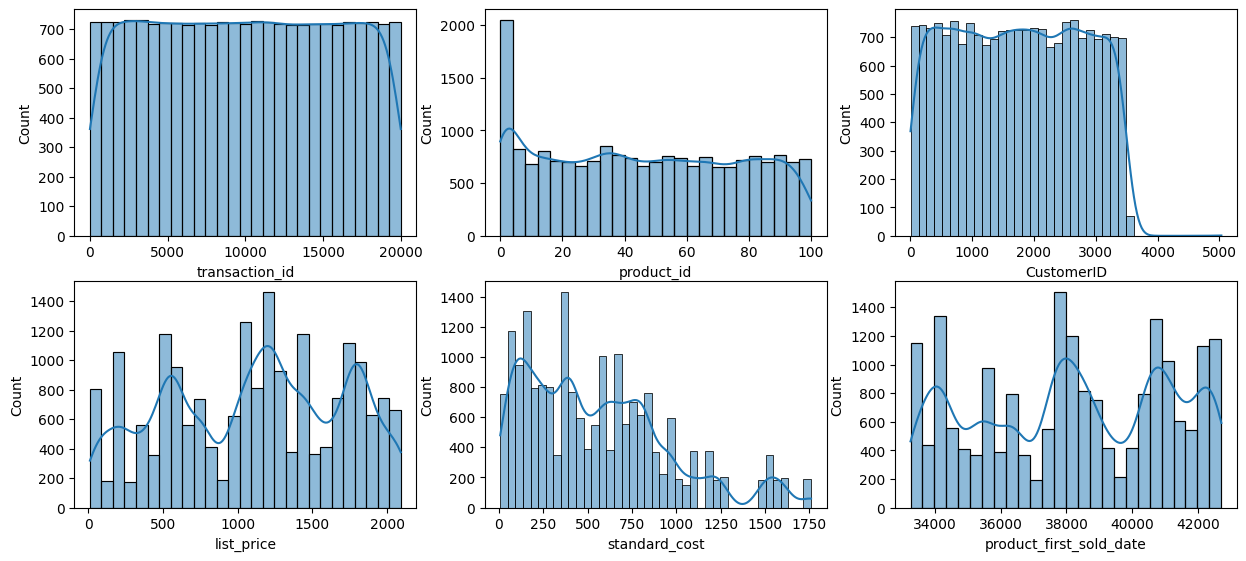

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10)) # kolom, baris

for posisi, nama_kolom in zip(range(1,10), numerik.columns): # posisi 1 sampai 9
    plt.subplot(3,3,posisi) # jumlah baris, jumlah kolom, posisi
    sns.histplot(df[nama_kolom], kde = True)

plt.show()

## Uji Statistik Data Numerik

In [12]:
# KS Test
from scipy.stats import kstest


for nama_kolom in numerik.columns:
    stat, pval = kstest(df[nama_kolom], 'norm')
    if pval < 0.05:
        print(f'Kolom {nama_kolom} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {nama_kolom}Distribusi normal (Terima H0)')

Kolom transaction_id Distribusi tidak normal (Tolak H0)
Kolom product_id Distribusi tidak normal (Tolak H0)
Kolom CustomerID Distribusi tidak normal (Tolak H0)
Kolom list_price Distribusi tidak normal (Tolak H0)
Kolom standard_cost Distribusi tidak normal (Tolak H0)
Kolom product_first_sold_date Distribusi tidak normal (Tolak H0)


In [13]:
# D'Agustino Pearson
from scipy.stats import normaltest

for kolom in numerik.columns:
    stat, pval = normaltest(df[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi transaction_id tidak normal (Tolak H0)
Distribusi product_id tidak normal (Tolak H0)
Distribusi CustomerID tidak normal (Tolak H0)
Distribusi list_price tidak normal (Tolak H0)
Distribusi standard_cost tidak normal (Tolak H0)
Distribusi product_first_sold_date tidak normal (Tolak H0)


## Outliers

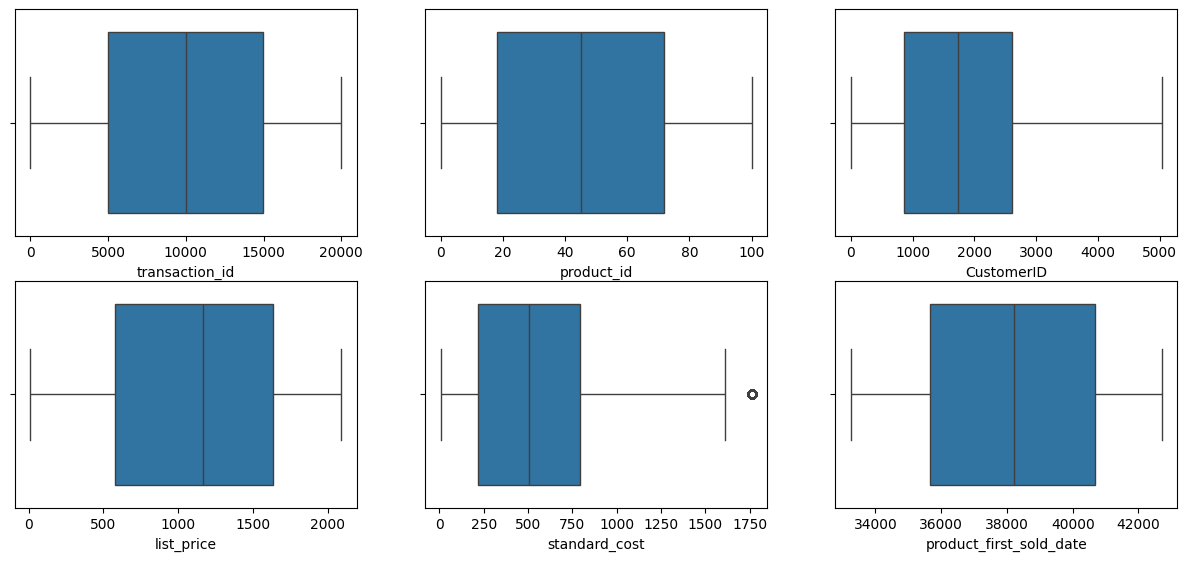

In [14]:
# atur size dari figure
plt.figure(figsize = (15,10)) # kolom, baris

for posisi, nama_kolom in zip(range(1,10), numerik.columns): # posisi 1 sampai 9
    plt.subplot(3,3,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x = df[nama_kolom])

plt.show()

In [15]:
df[df['standard_cost']>=1750]

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
59,60,60,3473,2017-12-18 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0,2017-12-18
142,143,60,2135,2017-01-26 00:00:00,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0,2017-01-26
291,292,64,3380,2017-10-28 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0,2017-10-28
412,413,60,720,2017-09-09 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0,2017-09-09
698,699,60,1535,2017-08-13 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,2017-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19190,19191,60,3411,2017-06-23 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40410.0,2017-06-23
19551,19552,64,844,2017-08-09 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,2017-08-09
19705,19706,60,54,2017-10-24 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0,2017-10-24
19722,19723,60,1841,2017-01-03 00:00:00,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,2017-01-03


In [16]:
for nama_kolom in numerik.columns:
    q3 = df[nama_kolom].quantile(0.75)
    q1 = df[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df[(df[nama_kolom] > batas_atas) | (df[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers transaction_id: 0
Jumlah Outliers product_id: 0
Jumlah Outliers CustomerID: 0
Jumlah Outliers list_price: 0
Jumlah Outliers standard_cost: 189
Jumlah Outliers product_first_sold_date: 0


## Uji Korelasi Antar Variabel Numerik

In [17]:
numerik.corr()

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
transaction_id,1.000000,-0.011633,0.002779,-0.006391,-0.002293,0.004391
product_id,-0.011633,1.000000,0.003369,0.090085,0.038830,-0.054155
CustomerID,0.002779,0.003369,1.000000,0.011671,0.006870,-0.002306
list_price,-0.006391,0.090085,0.011671,1.000000,0.551666,0.059164
standard_cost,-0.002293,0.038830,0.006870,0.551666,1.000000,0.030714
product_first_sold_date,0.004391,-0.054155,-0.002306,0.059164,0.030714,1.000000


<Axes: >

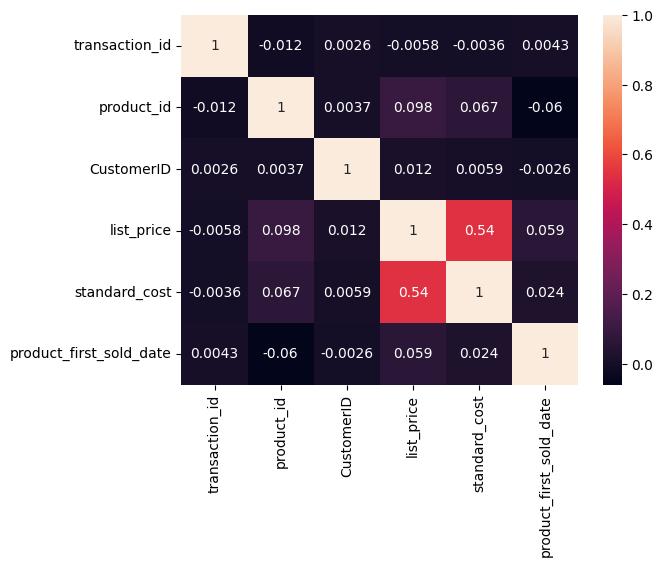

In [18]:
sns.heatmap(numerik.corr(method='spearman'), annot= True)

# Variabel Kategorik

In [19]:
# ambil yang kategorik saja
kategorik = df.select_dtypes(exclude = 'number') # sama saja
kategorik = df.select_dtypes(include = 'object') # sama saja
kategorik

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size
0,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium
1,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large
2,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium
3,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium
4,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large
...,...,...,...,...,...,...,...
19995,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium
19996,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium
19997,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium
19998,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium


In [20]:
kategorik.describe()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size
count,19445,19445,19445,19445,19445,19445,19445
unique,364,2,2,6,4,3,3
top,2017-08-18 00:00:00,True,Approved,Solex,Standard,medium,medium
freq,81,9739,19273,4169,13920,13587,12767


In [21]:
unik = kategorik.nunique()
unik.rename('Jumlah Unique Value')

,Jumlah Unique Value
transaction_date,364
online_order,2
order_status,2
brand,6
product_line,4
product_class,3
product_size,3


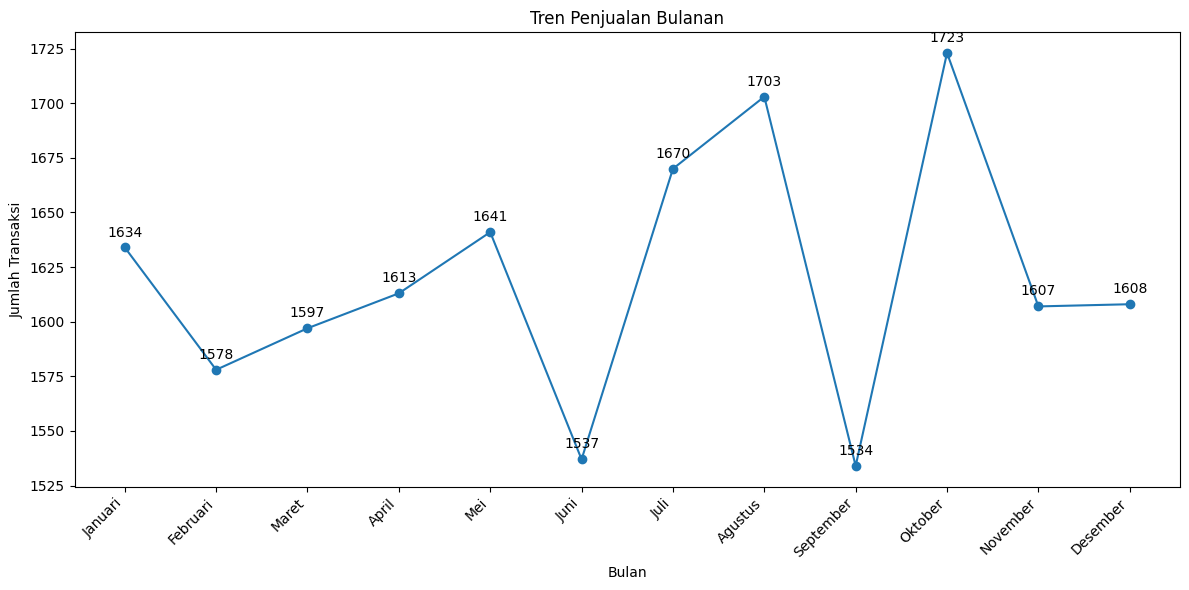

In [22]:
import matplotlib.pyplot as plt

df['Month'] = df['InvoiceDate'].dt.month

# Group by month and jumlah transaksi setiap InvoiceDate
monthly_sales = df.groupby('Month')['InvoiceDate'].count()

# Ubah label month
month_names = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}
monthly_sales.index = monthly_sales.index.map(month_names)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')

# tambahkan angka di tiap titik data
for i, v in enumerate(monthly_sales.values):
    plt.text(i, v + 5, str(v), ha='center')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Tren Penjualan Bulanan')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [23]:
# category product line count values
product_line_counts = df['product_line'].value_counts()
product_line_counts

,count
product_line,
Standard,13920
Road,3894
Touring,1213
Mountain,418


<ipython-input-24-97a4dbc9017e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_counts.index, y=product_line_counts.values, palette="viridis")


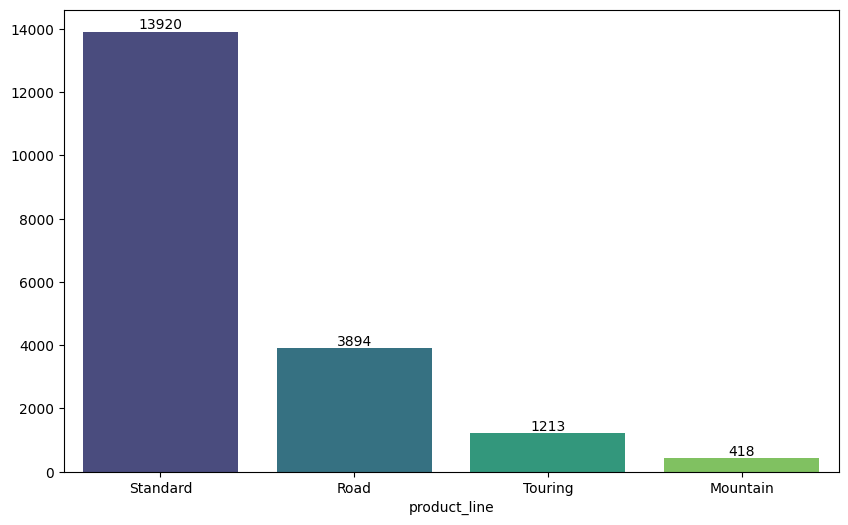

In [24]:
# buat visualisasi data jumlah transaksi procut line
plt.figure(figsize=(10, 6))
sns.barplot(x=product_line_counts.index, y=product_line_counts.values, palette="viridis")

# tambahkan angka tiap bar
for i, v in enumerate(product_line_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Data Insight

In [25]:
# buat brand count values
brand_counts = df['brand'].value_counts()
brand_counts

,count
brand,
Solex,4169
WeareA2B,3245
Giant Bicycles,3244
OHM Cycles,2993
Trek Bicycles,2931
Norco Bicycles,2863


In [26]:
# cek standard cost dari masing-masing brand
df.groupby('brand')['standard_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,3244.0,760.187781,356.521811,173.18,582.48,709.48,954.82,1759.85
Norco Bicycles,2863.0,614.988718,322.165974,206.35,376.84,521.94,795.10,1479.11
OHM Cycles,2993.0,494.971607,482.589323,7.21,101.58,248.82,874.90,1610.90
Solex,4169.0,489.977293,360.156704,53.62,151.96,448.90,675.03,1516.13
Trek Bicycles,2931.0,568.900686,437.542495,154.40,297.43,388.92,598.76,1580.47
WeareA2B,3245.0,426.804394,377.330755,13.44,131.92,260.14,762.63,1259.36


In [27]:
# cek sebaran harga masing-masing product line
df.groupby('product_line')['list_price'].describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
Mountain,418.0,628.089856,56.952804,574.64,574.64,574.64,688.63,688.63
Road,3894.0,1018.542167,554.019155,12.01,544.05,980.37,1538.99,1894.19
Standard,13920.0,1102.063492,587.572792,60.34,575.27,1163.89,1577.53,2091.47
Touring,1213.0,1618.057007,358.745970,1073.07,1362.99,1466.68,1890.39,2083.94


In [28]:
# cek sebaran harga masing-masing brand
df.groupby('brand')['list_price'].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,3244.0,1235.269547,505.690117,230.91,792.90,1311.44,1635.30,1977.36
Norco Bicycles,2863.0,913.015830,404.282192,360.40,544.05,958.74,1216.14,1661.92
OHM Cycles,2993.0,980.625573,650.854278,12.01,235.63,1073.07,1636.90,2005.66
Solex,4169.0,1055.060134,605.242741,71.49,478.16,1071.23,1577.53,2083.94
Trek Bicycles,2931.0,1185.523374,645.761649,290.62,533.51,1057.51,1775.81,2091.47
WeareA2B,3245.0,1264.303834,546.665957,60.34,1065.03,1292.84,1762.96,1992.93


In [29]:
# cek nama-nama produk per brand unique
df.groupby('brand')['product_line'].unique()

,product_line
brand,
Giant Bicycles,"[Standard, Road, Touring]"
Norco Bicycles,"[Standard, Road, Mountain]"
OHM Cycles,"[Standard, Road, Touring]"
Solex,"[Standard, Touring, Road]"
Trek Bicycles,"[Standard, Mountain, Road]"
WeareA2B,"[Standard, Touring, Road]"


Data Brand

<ipython-input-30-e548a5aab7e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


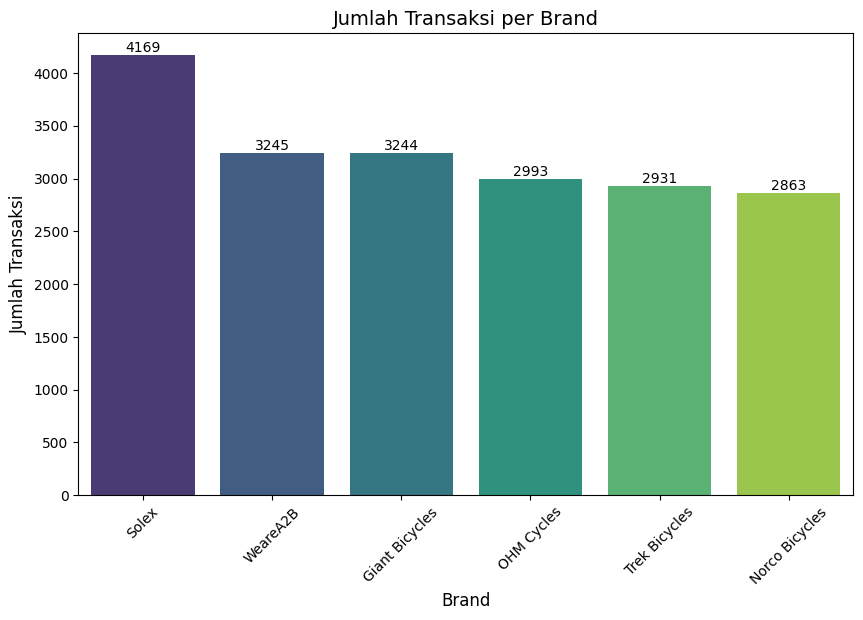

In [30]:
# Hitung jumlah transaksi per brand
brand_counts = df["brand"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")

# Tambahkan label
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.title("Jumlah Transaksi per Brand", fontsize=14)
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca

# tambahkan angka tiap bar
for i, v in enumerate(brand_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Tampilkan plot
plt.show()

In [31]:
# total keuntungan tiap brand dari data list_price - standard_cost
df['profit'] = df['list_price'] - df['standard_cost']
brand_profit = df.groupby('brand')['profit'].sum()
brand_profit

,profit
brand,
Giant Bicycles,1.541165e+06
Norco Bicycles,8.532516e+05
OHM Cycles,1.453562e+06
Solex,2.355830e+06
Trek Bicycles,1.807321e+06
WeareA2B,2.717686e+06


<ipython-input-32-8a3d6b318b1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_profit.sort_values(ascending=False).index, y=brand_profit.sort_values(ascending=False).values, palette="viridis")


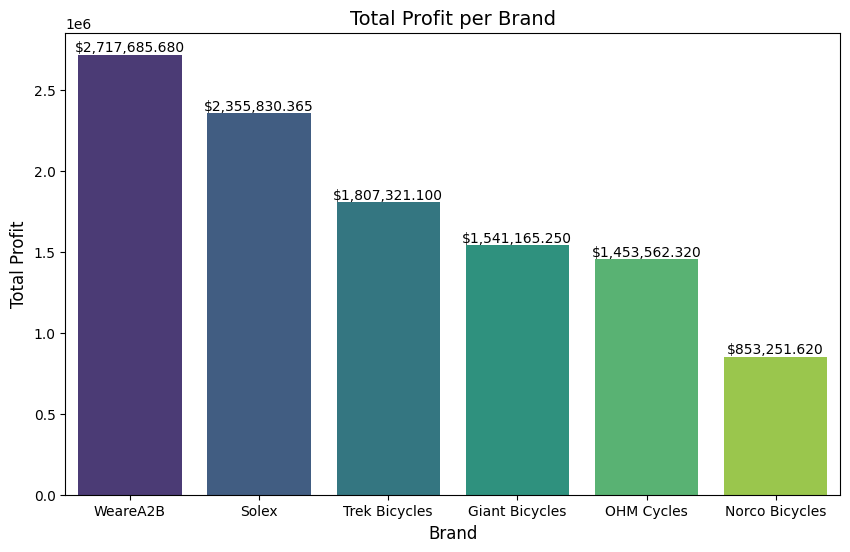

In [32]:
# buat visualisasi total profit per brand dengan diurutkan dari kiri yang terbesar
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_profit.sort_values(ascending=False).index, y=brand_profit.sort_values(ascending=False).values, palette="viridis")

# tambahkan judul, xlabel dan ylabel
plt.title("Total Profit per Brand", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)

# tambahkan angka tiap bar dengan desimal 3 angka dibelakang koma dan tampilan dolar dengan pemisah ribuan
for i, v in enumerate(brand_profit.sort_values(ascending=False).values):
    plt.text(i, v, f"${v:,.3f}", ha='center', va='bottom', fontsize=10)

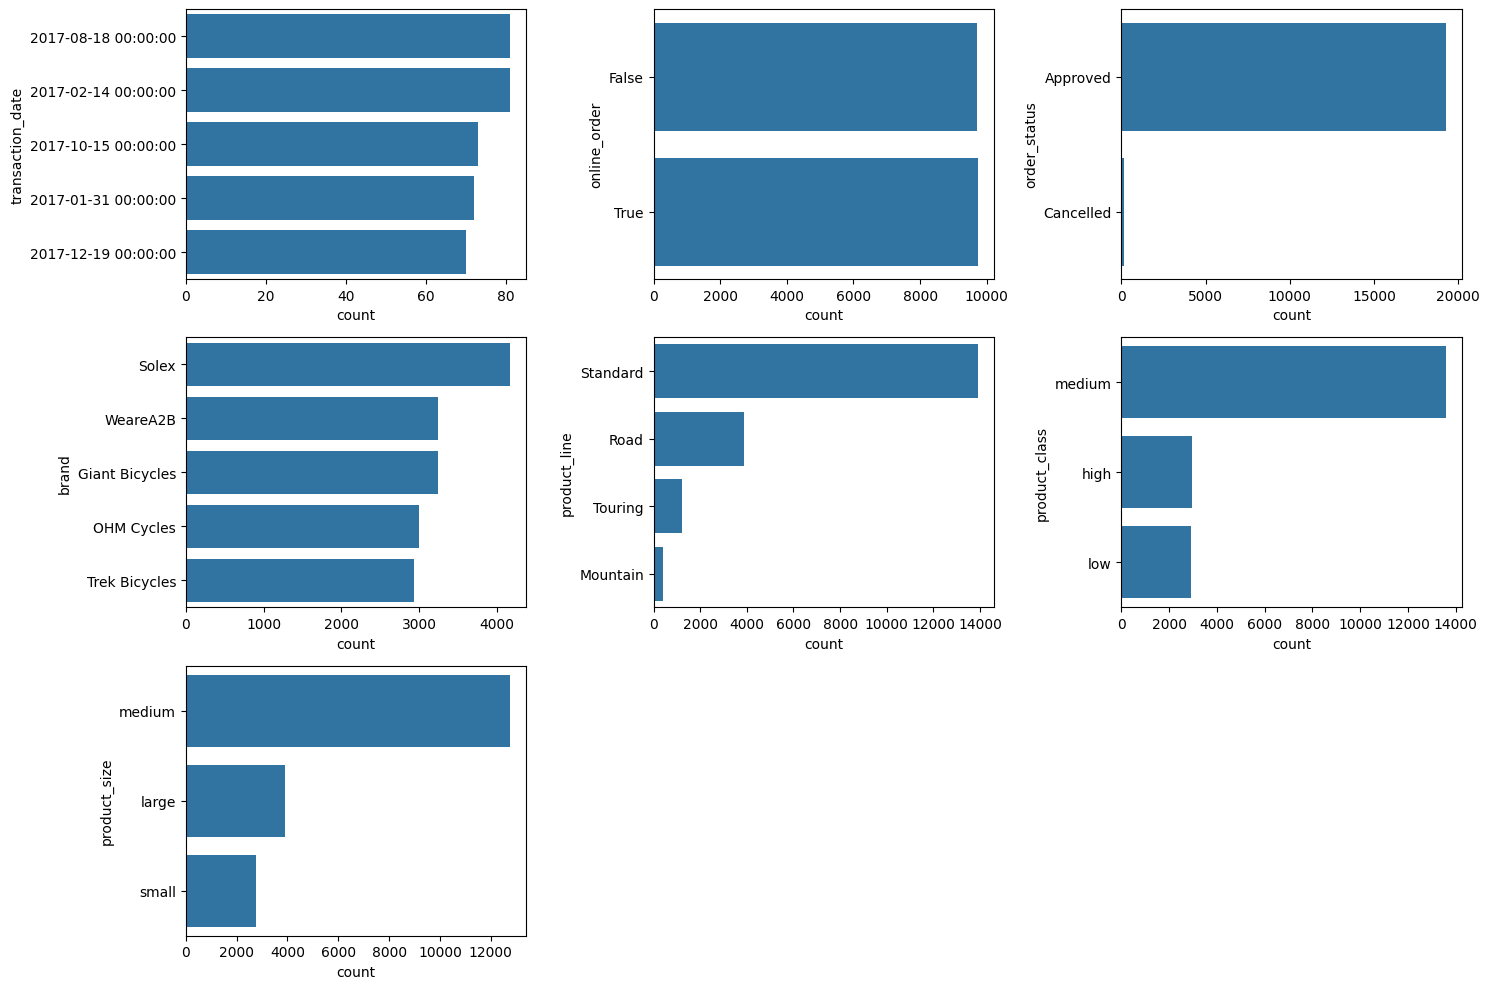

In [33]:
# ambil semua yg kategorik
import matplotlib.pyplot as plt
import seaborn as sns
kategorik = df.select_dtypes(include = 'object')

plt.figure(figsize = (15,10)) # (kolom, bairs)
posisi = 1
for kolom in kategorik.columns:
    plt.subplot(3, 3, posisi) # (baris, kolom, posisi)
    sns.barplot(df[kolom].value_counts().sort_values(ascending = False).head(5), orient = 'h')
    posisi += 1
    plt.tight_layout() # biar tidak bertabrakan

# mengeprint grafik
plt.show()


# RFM Analysis

## Recency

In [34]:
# ubah transaction_date ke tipe datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 non-nu

In [35]:
# cek data order_status
df['order_status'].value_counts()

,count
order_status,
Approved,19273
Cancelled,172


In [36]:
# drop data yang order statusnya cancel
df = df[df['order_status']!='Cancelled']
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Month,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,5,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,10,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,8,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,10,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,6,802.26
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,11,104.24
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,4,1592.19
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,7,91.15


In [37]:
# cek tanggal terakhir transaksi
current_date = df['transaction_date'].max()
current_date

Timestamp('2017-12-30 00:00:00')

In [38]:
# mencari tanggal terakhir (last transaction) untuk setiap customer

last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

,InvoiceDate
CustomerID,
1,2017-12-23
2,2017-08-24
3,2017-09-19
4,2017-06-18
5,2017-12-14
...,...
3497,2017-11-08
3498,2017-08-25
3499,2017-11-09


In [39]:
recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency

,Recency
CustomerID,
1,7
2,128
3,102
4,195
5,16
...,...
3497,52
3498,127
3499,51


## Frequency

In [41]:
frequency = df.groupby('CustomerID')['transaction_id'].nunique().rename('Frequency')
frequency

,Frequency
CustomerID,
1,11
2,3
3,7
4,2
5,6
...,...
3497,3
3498,6
3499,7


## Monetary

In [42]:
monetary = df.groupby('CustomerID')['list_price'].sum().rename('Monetary')
monetary

,Monetary
CustomerID,
1,9084.45
2,4149.07
3,9525.22
4,1047.72
5,5903.20
...,...
3497,3744.07
3498,5177.06
3499,7673.48


In [43]:
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,7,9525.22
3,4,195,2,1047.72
4,5,16,6,5903.20
...,...,...,...,...
3485,3497,52,3,3744.07
3486,3498,127,6,5177.06
3487,3499,51,7,7673.48
3488,3500,144,6,4922.41


In [44]:
rfm.sort_values('Frequency', ascending = False).head(20)

,CustomerID,Recency,Frequency,Monetary
2470,2476,14,14,14578.69
2177,2183,8,14,19071.32
1064,1068,4,14,14254.55
1941,1946,88,13,11237.38
635,637,7,13,13899.73
1908,1913,42,13,8621.87
2067,2072,8,13,11845.44
2904,2912,46,13,14149.73
1125,1129,26,13,18349.27
2458,2464,2,13,14574.06


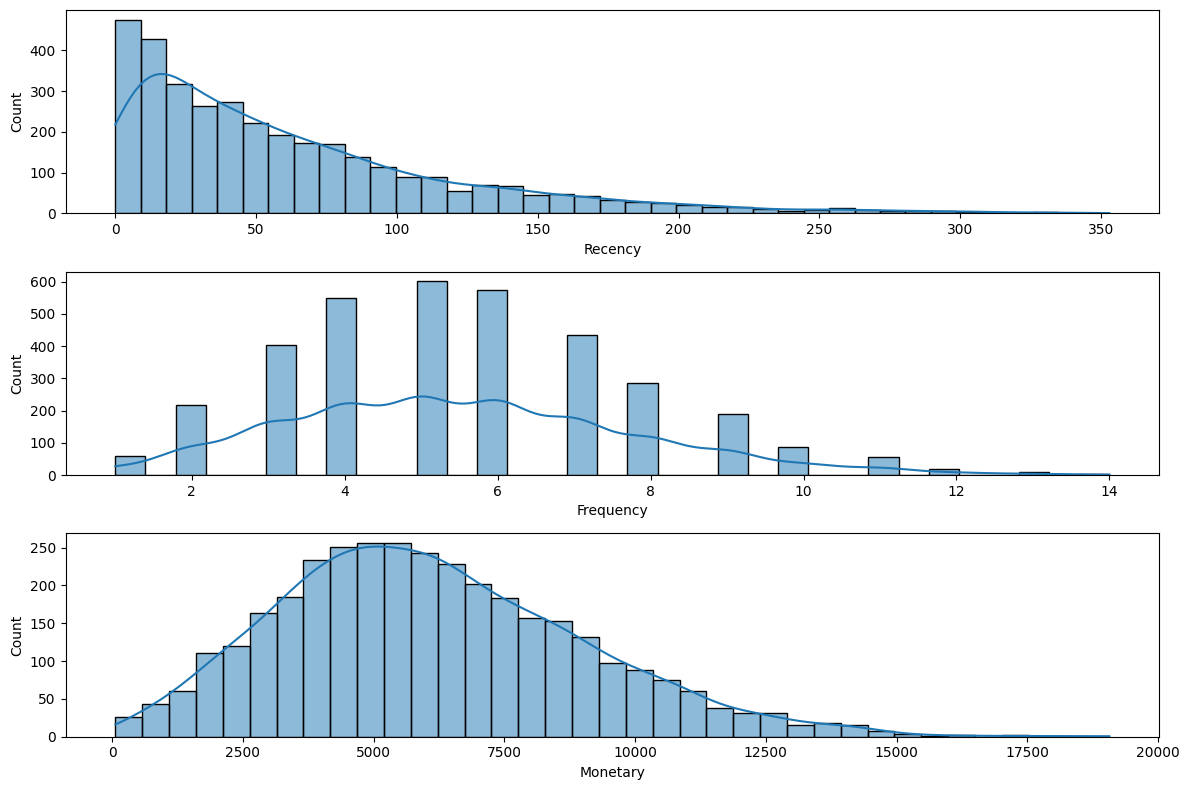

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.histplot(rfm['Recency'], kde=True)

plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'], kde=True)

plt.subplot(3,1,3)
sns.histplot(rfm['Monetary'], kde=True)


plt.tight_layout()
plt.show()

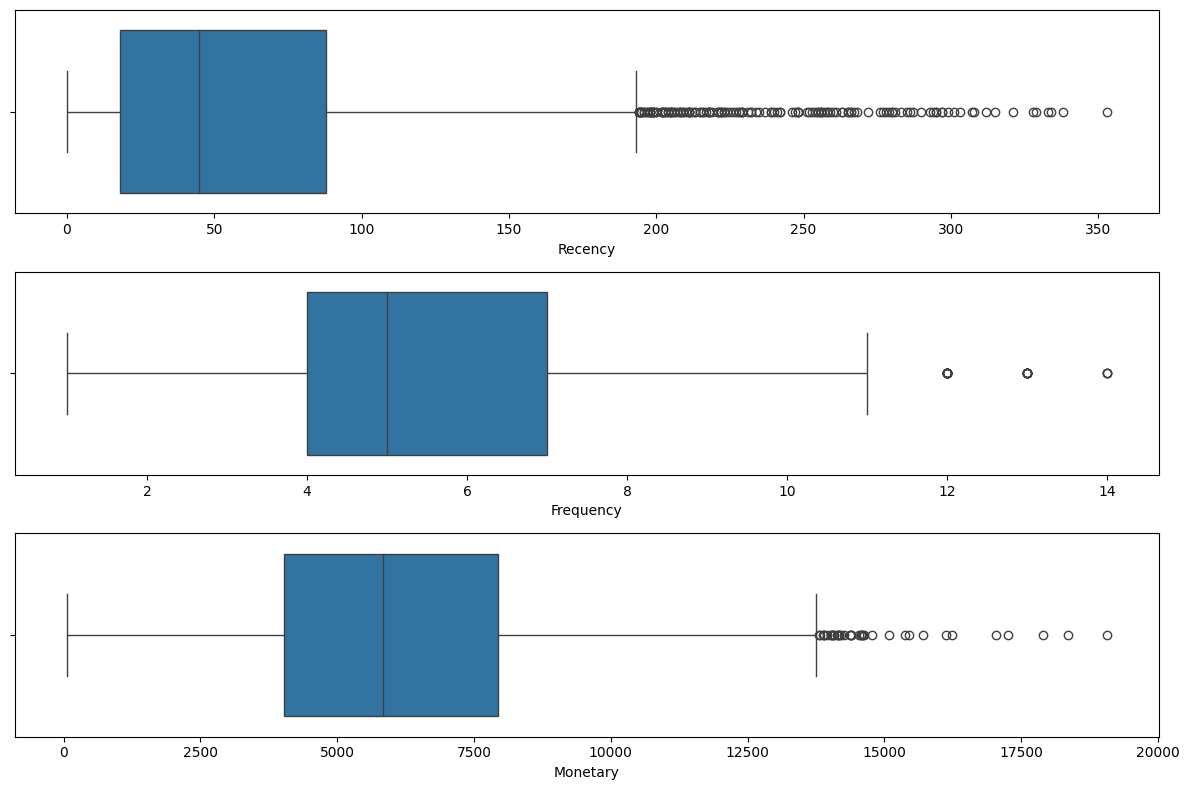

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.boxplot(x = rfm['Recency'])

plt.subplot(3,1,2)
sns.boxplot(x = rfm['Frequency'])

plt.subplot(3,1,3)
sns.boxplot(x = rfm['Monetary'])


plt.tight_layout()
plt.show()

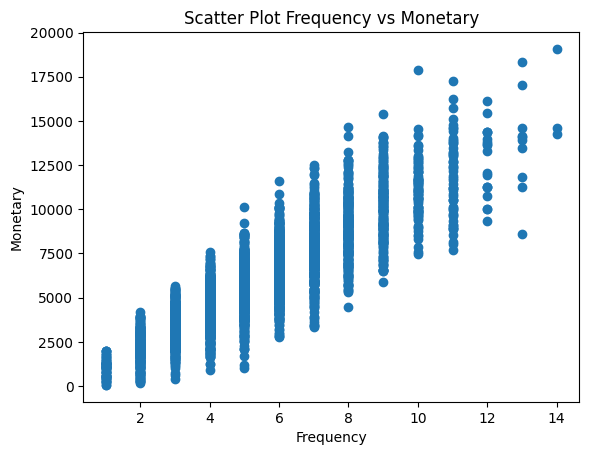

In [47]:
# buat scatter plot korelas frekuensi dan monetary
plt.scatter(rfm['Frequency'], rfm['Monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Scatter Plot Frequency vs Monetary')
plt.show()

In [48]:
# mendefinisikan score dari statistika deskriptif nya
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3490.000000,3490.000000,3490.000000,3490.000000
mean,1750.092837,62.847564,5.522350,6113.584424
std,1011.348380,59.365082,2.275693,2898.017543
min,1.000000,0.000000,1.000000,60.340000
25%,876.250000,18.000000,4.000000,4023.002500
50%,1749.500000,45.000000,5.000000,5829.050000
75%,2622.750000,88.000000,7.000000,7934.462500
max,5034.000000,353.000000,14.000000,19071.320000


## RFM Score

In [49]:
def rfm_score(baris):
    # recency
    if baris['Recency'] <= 18: #Q1
        r = 4
    elif baris['Recency'] <= 45: # Q2
        r = 3
    elif baris['Recency'] <= 88: # Q3
        r = 2
    else:
        r = 1

    # fequency
    if baris['Frequency'] <= 4: #Q1
        f = 1
    elif baris['Frequency'] <= 5: # Q2
        f = 2
    elif baris['Frequency'] <= 7: # Q3
        f = 3
    else:
        f = 4

    # monetary
    if baris['Monetary'] <= 4000: #Q1
        m = 1
    elif baris['Monetary'] <= 5800: # Q2
        m = 2
    elif baris['Monetary'] <= 7900: # Q3
        m = 3
    else:
        m = 4

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,4,4,4,12
1,2,128,3,4149.07,1,1,2,4
2,3,102,7,9525.22,1,3,4,8
3,4,195,2,1047.72,1,1,1,3
4,5,16,6,5903.20,4,3,3,10
...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4
3486,3498,127,6,5177.06,1,3,2,6
3487,3499,51,7,7673.48,2,3,3,8
3488,3500,144,6,4922.41,1,3,2,6


## Segmentasi

In [50]:
rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']
    if recency >= 4 and fm_combined >= 4:
        return 'Diamond'
    elif recency >= 3 and fm_combined >= 3:
        return 'Titanium'
    elif recency >= 2 and fm_combined >= 3:
        return 'Gold'
    elif recency >= 3 and fm_combined <= 2:
        return 'Silver'
    elif recency < 2 and fm_combined >= 3:
        return 'Bronze'
    elif recency < 2 and fm_combined <= 2:
        return 'Paladium'
    else:
        return 'Regular'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,1,7,11,9084.45,4,4,4,12,8,Diamond
1,2,128,3,4149.07,1,1,2,4,3,Bronze
2,3,102,7,9525.22,1,3,4,8,7,Bronze
3,4,195,2,1047.72,1,1,1,3,2,Paladium
4,5,16,6,5903.20,4,3,3,10,6,Diamond
...,...,...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4,2,Regular
3486,3498,127,6,5177.06,1,3,2,6,5,Bronze
3487,3499,51,7,7673.48,2,3,3,8,6,Gold
3488,3500,144,6,4922.41,1,3,2,6,5,Bronze


In [51]:
rfm['Customer_Segment'].value_counts()

,count
Customer_Segment,
Titanium,821
Diamond,691
Gold,683
Bronze,531
Paladium,338
Silver,244
Regular,182


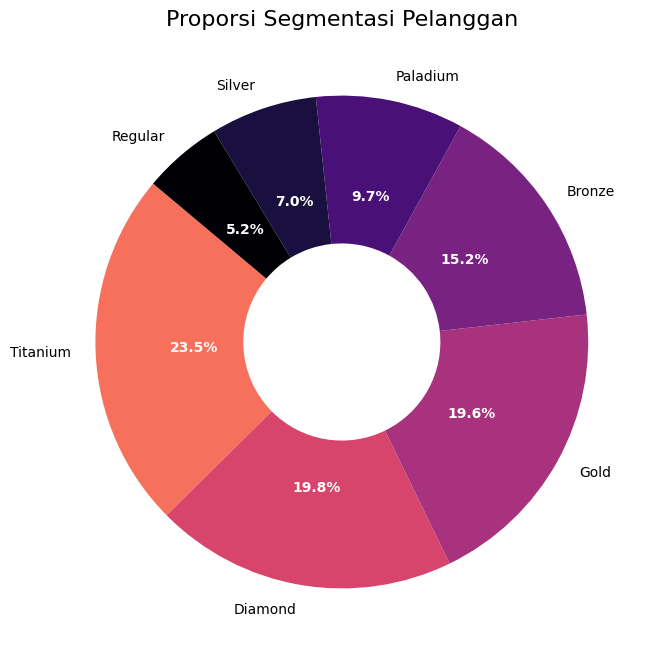

In [53]:
segment_counts = rfm['Customer_Segment'].value_counts()
segment_proportions = segment_counts / segment_counts.sum()

# Generate distinct blue gradient colors
color_indices = np.linspace(0.3, 1, len(segment_proportions))  # Jarak lebih besar untuk perbedaan mencolok
colors = plt.cm.magma_r(color_indices)  # Gunakan colormap 'Purples'

# Create the pie chart with a hole in the middle
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    segment_proportions,
    labels=segment_proportions.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.6}  # Membuat lubang di tengah
)

# Improve label readability
plt.setp(autotexts, size=10, weight="bold", color='white')
plt.setp(texts, size=10)

# judul pie chart
plt.title('Proporsi Segmentasi Pelanggan', fontsize=16)

plt.show()


In [54]:
# melihat cust id dengan skor RFM tertinggi
rfm.sort_values('RFM_Score', ascending = False).head(10).reset_index()

,index,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,0,1,7,11,9084.45,4,4,4,12,8,Diamond
1,1080,1084,4,10,11206.14,4,4,4,12,8,Diamond
2,379,381,2,8,8019.80,4,4,4,12,8,Diamond
3,375,377,6,11,9343.58,4,4,4,12,8,Diamond
4,3005,3013,4,9,8161.56,4,4,4,12,8,Diamond
5,1087,1091,4,10,10147.25,4,4,4,12,8,Diamond
6,2077,2083,15,9,10347.28,4,4,4,12,8,Diamond
7,2067,2072,8,13,11845.44,4,4,4,12,8,Diamond
8,366,368,13,9,9300.06,4,4,4,12,8,Diamond
9,2065,2070,4,8,10228.07,4,4,4,12,8,Diamond


# Cohort Analysis

In [55]:
# mengekstrak tahun dan bulan dari invoice date
df['InvoiceDate'].dt.to_period('M') # mengambil data year sampai month

,InvoiceDate
0,2017-02
1,2017-05
2,2017-10
3,2017-08
4,2017-10
...,...
19995,2017-06
19996,2017-11
19997,2017-04
19998,2017-07


In [56]:
# mengelompokkan setiap cust id per bulan untuk mengetahui date acquisition min per cust id
df.groupby('CustomerID')['InvoiceDate'].min().to_frame()

,InvoiceDate
CustomerID,
1,2017-01-05
2,2017-05-04
3,2017-02-23
4,2017-04-03
5,2017-03-03
...,...
3497,2017-09-01
3498,2017-02-03
3499,2017-01-12


In [57]:
# melakukan groupby tapi baris datanya dipertahankan (kalau di SQL = over)
df['Acquisition_Date'] = (
    df.groupby('CustomerID')['InvoiceDate']  # Group by CustomerID dan pilih kolom InvoiceDate
    .transform('min')  # Ambil tanggal minimum (tanggal akuisisi)
    .dt.to_period('M')  # Ubah ke format periode bulan
)

df

<ipython-input-57-d5988e66b208>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acquisition_Date'] = (


,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Month,profit,Acquisition_Date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2,17.87,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,5,1702.55,2017-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,10,1544.61,2017-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,8,817.36,2017-02
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,10,1055.82,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,6,802.26,2017-01
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,11,104.24,2017-01
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,4,1592.19,2017-04
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,7,91.15,2017-02


In [58]:
df['Acquisition_Date'].value_counts()

,count
Acquisition_Date,
2017-01,8150
2017-02,4655
2017-03,2627
2017-04,1749
2017-05,963
2017-06,529
2017-07,298
2017-08,164
2017-09,62


## Transaction Month

In [59]:
# track data pembelian per cust id
df['Transaction_Month'] = df['InvoiceDate'].dt.to_period('M')
df

<ipython-input-59-859eb2e37fe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction_Month'] = df['InvoiceDate'].dt.to_period('M')


,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Month,profit,Acquisition_Date,Transaction_Month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2,17.87,2017-02,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,5,1702.55,2017-01,2017-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,10,1544.61,2017-01,2017-10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,8,817.36,2017-02,2017-08
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,10,1055.82,2017-01,2017-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,6,802.26,2017-01,2017-06
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,11,104.24,2017-01,2017-11
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,4,1592.19,2017-04,2017-04
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,7,91.15,2017-02,2017-07


## Jumlah User tiap Acq Date

In [60]:
cohort_table = df.groupby(['Acquisition_Date','Transaction_Month'])['CustomerID'].nunique()
# rename kolom CustomerID menjadi Jumlah_User
cohort_table = cohort_table.rename('Jumlah_User', inplace=True).reset_index()
cohort_table

,Acquisition_Date,Transaction_Month,Jumlah_User
0,2017-01,2017-01,1315
1,2017-01,2017-02,461
2,2017-01,2017-03,475
3,2017-01,2017-04,474
4,2017-01,2017-05,470
...,...,...,...
73,2017-10,2017-11,6
74,2017-10,2017-12,7
75,2017-11,2017-11,15
76,2017-11,2017-12,6


## Period Month

In [61]:
cohort_table['Period_Month'] = cohort_table['Transaction_Month'].dt.month - cohort_table['Acquisition_Date'].dt.month
cohort_table

,Acquisition_Date,Transaction_Month,Jumlah_User,Period_Month
0,2017-01,2017-01,1315,0
1,2017-01,2017-02,461,1
2,2017-01,2017-03,475,2
3,2017-01,2017-04,474,3
4,2017-01,2017-05,470,4
...,...,...,...,...
73,2017-10,2017-11,6,1
74,2017-10,2017-12,7,2
75,2017-11,2017-11,15,0
76,2017-11,2017-12,6,1


## Pivot Table

In [62]:
cohort_pivot = cohort_table.pivot_table(index='Acquisition_Date', columns='Period_Month', values='Jumlah_User')
cohort_pivot

Period_Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisition_Date,,,,,,,,,,,,
2017-01,1315.0,461.0,475.0,474.0,470.0,455.0,488.0,498.0,469.0,496.0,466.0,489.0
2017-02,794.0,307.0,290.0,304.0,272.0,290.0,301.0,275.0,319.0,295.0,278.0,NaN
2017-03,489.0,168.0,169.0,162.0,177.0,183.0,168.0,203.0,181.0,185.0,NaN,NaN
2017-04,342.0,109.0,120.0,155.0,141.0,120.0,143.0,124.0,131.0,NaN,NaN,NaN
2017-05,217.0,88.0,78.0,87.0,72.0,72.0,73.0,83.0,NaN,NaN,NaN,NaN
2017-06,127.0,48.0,45.0,51.0,48.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07,84.0,30.0,28.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,54.0,17.0,24.0,19.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,26.0,8.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Jumlah User jadi Persentase

In [63]:
cohort_pivot_per = cohort_pivot.apply(lambda x: x/x.iloc[0]*100, axis = 1)
cohort_pivot_per

Period_Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisition_Date,,,,,,,,,,,,
2017-01,100.0,35.057034,36.121673,36.045627,35.741445,34.600760,37.110266,37.870722,35.665399,37.718631,35.437262,37.186312
2017-02,100.0,38.664987,36.523929,38.287154,34.256927,36.523929,37.909320,34.634761,40.176322,37.153652,35.012594,NaN
2017-03,100.0,34.355828,34.560327,33.128834,36.196319,37.423313,34.355828,41.513292,37.014315,37.832311,NaN,NaN
2017-04,100.0,31.871345,35.087719,45.321637,41.228070,35.087719,41.812865,36.257310,38.304094,NaN,NaN,NaN
2017-05,100.0,40.552995,35.944700,40.092166,33.179724,33.179724,33.640553,38.248848,NaN,NaN,NaN,NaN
2017-06,100.0,37.795276,35.433071,40.157480,37.795276,36.220472,40.944882,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,35.714286,33.333333,39.285714,46.428571,29.761905,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,31.481481,44.444444,35.185185,27.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.769231,30.769231,34.615385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Heatmap Cohort

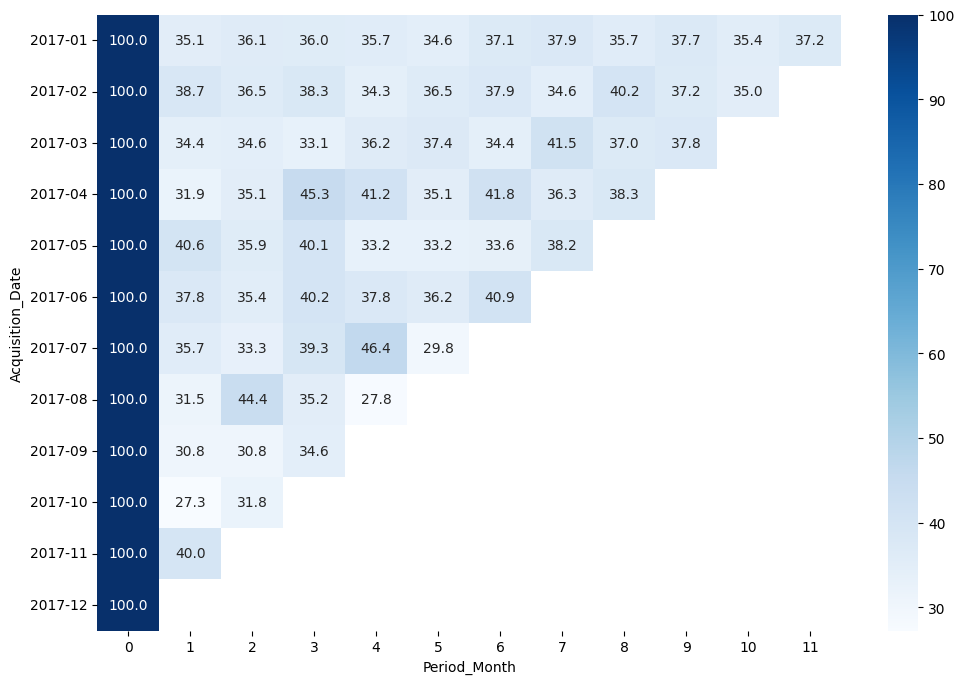

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.heatmap(cohort_pivot_per, annot=True, cmap='Blues', fmt = '.1f')
plt.show()